# Escience Course Report

## Group 1:
## Arctic - SCHMARTIC: SCHool of Model evaluation of AeRosol-Cloud inTeractions Important for Climate

### Evaluating NorESM for process interactions of aerosols and cloud formation in the arctic.

Lets keep this here in case we need an Abstract later, which I will write at the end once I already know what the whole report will be about.

## Introduction

Structure:
- importance of clouds for radiative feedbacks for future climate predictions
- CCN importance in cloud formation
- sulphate and air composition importance for CCN production
- Models need to get all this correct in order to make sure that the radiative balances and therefore the future predictions are also correct.
    - Are they doing this?
- This paper will focus on the role of sulphate and the production of CCN's.

Predicting the future of Earth's changing climate is a vital need that requires models providing accurate and trustworthy expectations of future conditions, so that actions may be taken to avoid adverse scenarios * . This is most true in the Artic where temperatures have been increasing at up to three times the average global rates encouraged by positive feedbacks * . Many of these are positive and leading to increased warming, for example increased temperatures leading to lower sea ice cover, causing lower average surface albedo, in turn leading to further warming via decreased reflected solar radiation * . Some are negative feedbacks and could help the climate remain in a more "normal" state by slowing the ongoing warming. One such feedback is the indirect impact of aerosols due to low-level clouds' cooling effect as they reflect and scatter more light before it can reach Earth's surface * . Modelling these clouds correctly is very important in painting a clearer picture for the future of a rapidly changing Arctic.

Modeling clouds is not as simple as just calculating the presence and height of clouds. The properties of clouds such as the brightness, cloud droplet size, and water vs ice crystal characteristics are integral in them being either net warming or net cooling * . Even when using the same sets of models, cloud feedbacks can be drastically different depending on the conditions portraied. This was show when Pithan and Mauritsen * found arctic clouds to have a slight positive feedback whilst Zelinka et al. * showed Arctic clouds to have a negative feedback despite using the same set of models. An element that influences these cloud properties is the number and composition of particles forming the cloud as well as their make up * . Cloud Condensation Nuclei (CCN) being precursors to cloud droplets (by having the potential to become activated cloud droplets), are therefore essential to properly modelling cloud properties.

The number of aerosol particles above the size of 50 and 100 nanometers (N50 and N100 respectively), can be used as an accurate proxy of CCN concentrations * . This is because the larger particles will become activated first as they require a lower super saturation to start growing. CCN additionally vary largely based on their source and their composition. In the Arctic, where the number of aerosols present can be limiting * , the creation of aerosols is highly linked to the formation and properties of clouds. Sulphate is important in lining insoluble aerosols in order to make them soluble * aiding in new particle formation and aerosol size growth * . Sea Spray is another significant source of aerosol particles in the arctic. As their size is quite large, *in the accumulation mode*, they are important for developing clouds. 

Models have become complex enough to simulate fine aspects of Earth's atmosphere such as the source and size of aerosols, as well as atmospheric processes which lead to cloud formation. However, due to the complex nature of these interactions, it is necessary to evaluate how accurately models portrait the concentrations of these aerosol species that form the base of the cloud formation process. This investigation aims to access the accuracy of the Norwegian Earth System Model (NorESM) by comparing its results to observation data, using the Zeppelin weather station in Ny-Ålesund as the study site. 

***Different Start***

Predicting Earth's changing climate is a vital need that requires models providing accurate and trustworthy expectations of future conditions, so that actions may be taken to avoid adverse scenarios. This is most true in the Artic where temperatures have been increasing at up to three times the average global rates encouraged by positive feedbacks. Many of these are positive and leading to increased warming, for example increased temperatures leading to lower sea ice cover, causing lower average surface albedo, in turn leading to further warming via decreased reflected solar radiation. Some are negative feedbacks and could help the climate remain in a more "normal" state by slowing the ongoing warming. One such feedback is the indirect impact of aerosols due to low-level clouds' cooling effect as they reflect and scatter more light before it can reach Earth's surface. Modelling these clouds correctly is very important in painting a clearer picture for the future of a rapidly changing Arctic.

***

## Methods

#### Importing packages

Packages used for importing, processing and ploting data:

In [56]:
!pip install threddsclient
import threddsclient
import s3fs
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Ignoring warning to clean up the report.

In [57]:
import warnings
warnings.filterwarnings('ignore')

#### Importing the data 

Model data used in this investigation was sourced from two nudged NorESM runs. The first was from 2012-2015, which used observation data. The second run from 2015 until 2018 was a look into the future. The model generated N50, N100, Black carbon (BC) data as well as several types of Sulphate and Sea Salt (SS) species, which were combined into a total sulphate concentration for the sake of this investigation.

In [58]:
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

*Editorial note:* Where possible code will be streamlines into functions in order to clear up clutter!!!

In [59]:
#Creating path to 2012-2015 Model run data
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_full/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_full_2012-01-01_2015-01-01_hour_locations.nc'

#Selecting the variables 
varl = ['N100','N200','N50', 'BC_AI', 'SS_A1','SS_A2','SS_A3','SO4_NA', 'SO4_A1', 'SO4_A2', 'SO4_AC','SO4_PR']

#Dataset for 2012 data
def make_file_path_for_var(v,):
    return path_to_data+v+postfix
filelist = [make_file_path_for_var(v) for v in varl]
list_of_s3_obj = [s3.open(s) for s in filelist]
ds2012 = xr.open_mfdataset(list_of_s3_obj)

#Creating path to 2015-2018 Model run data
path_to_data = 's3://escience2022/Sara/NorESM_nudged_data/postproc/stations/OsloAero_intBVOC_f09_f09_mg17_ssp245/'
postfix = '_OsloAero_intBVOC_f09_f09_mg17_ssp245_2015-01-01_2018-01-01_hour_locations.nc'

#Dataset for 2015 data
filelist = [make_file_path_for_var(v) for v in varl]
list_of_s3_obj = [s3.open(s) for s in filelist]
ds = xr.open_mfdataset(list_of_s3_obj)

#Removing overlap and Merging the datasets
ds2012= ds2012.sel(time= slice('2012-01-01','2014-12-31'))
ds = xr.merge([ds2012,ds])

#Creating a sum of all Sea Salt (SS_Model) and all Sulphate (SO4_Model)
ds['SS_Model'] = 0
ds['SS_Model'] = ds['SS_Model'] + ds['SS_A1'] + ds['SS_A2'] + ds['SS_A3']
ds['SS_Model'].attrs['units'] ='kg/kg'

ds['SO4_Model'] = 0
ds['SO4_Model'] = ds['SO4_Model'] + ds['SO4_NA'] + ds['SO4_A1'] + ds['SO4_A2'] +  ds['SO4_AC'] + ds['SO4_PR']
ds['SO4_Model'].attrs['units'] ='kg/kg'

#Converting the concentrations from kg/kg to ug/m3 (this is how the data is represented in the observations)
T_standard =  273.15 #K
p_standard = 1e5 #Pa
R = 287.058

rho = p_standard/(R*T_standard)

var = 'SO4_Model'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'

var = 'SS_Model'
if ds[var].attrs['units'] =='kg/kg':
    ds[var] = ds[var]*rho
    ds[var].attrs['units'] = 'kg/m3'
    ## Change to ug/m3
    ds[var] = ds[var]*1e9
    ds[var].attrs['units'] = 'ug/m3'

#Obtaining daily values to reduce outliers
ds_daily = ds.resample(time='d').mean('time')
ds_daily['season']= ds_daily['time.season']

Observation data from Zeppelin was obtained from the open source EBAS Catalogue. Multiple timeseries were combined to overlap with the modeling data available.

In [60]:
all_opendap_urls = threddsclient.opendap_urls(
'https://thredds.nilu.no/thredds/catalog/ebas/catalog.xml')

# Importing the data
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.19930101070000.20210421112338.filter_3pack..aerosol.18y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'
dsmf_SUL = xr.open_dataset(opendap_urls)
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20110101070000.20210420142507.filter_3pack...1y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'
dsmf_S2011 = xr.open_dataset(opendap_urls)
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20120101070000.20210421112338.filter_3pack...6y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'
dsmf_S2012 = xr.open_dataset(opendap_urls)
opendap_urls = 'https://thredds.nilu.no/thredds/dodsC/ebas/NO0042G.20180101070000.20220405123416.filter_3pack...4y.1d.NO01L_f3p_d_0042.NO01L_IC.lev2.nc'
dsmf_S2018 = xr.open_dataset(opendap_urls)

#Singling out Sulphate and Sea Salt from data
dsmf_Sul = xr.Dataset()
dsmf_fixtime= xr.Dataset()
dsmf_fixtime_Salt = xr.Dataset()
dsmf_salt = xr.Dataset()
dsmf_fixtime['SO4'] = xr.concat([dsmf_SUL['sulphate_total_ug_per_m3'],dsmf_S2011['sulphate_total_ug_per_m3'],dsmf_S2012['sulphate_total_ug_per_m3'],dsmf_S2018['sulphate_total_ug_per_m3']],dim = 'time')
dsmf_fixtime_Salt['SS'] = xr.concat([dsmf_SUL['sodium'],dsmf_S2011['sodium'],dsmf_S2012['sodium'],dsmf_S2018['sodium']],dim = 'time')

#Values were samples at 19:00, resampling at 00:00 resolves any conflict when plotting
dsmf_Sul = dsmf_fixtime.resample(time='d').mean('time')
dsmf_salt = dsmf_fixtime_Salt.resample(time='d').mean('time')


# get all data urls for one station, e.g., Zeppelin NO0042G
opendap_urls = [x for x in all_opendap_urls if 'NO0042G' in x]
# get all scattering data urls
opendap_urls = [x for x in opendap_urls if 'particle_number_size_distribution' in x]
opendap_urls = [x for x in opendap_urls if 'lev2' in x]

dsmf00 = xr.open_mfdataset(opendap_urls[3:4])
dsmf06 = xr.open_mfdataset(opendap_urls[2:3])
dsmf08 = xr.open_mfdataset(opendap_urls[:1])
dsmf10 = xr.open_dataset('../../../Data/dNdlogD_data_dmps_cleaned_2010-2020.nc')

#Values are hourly, resampling in order to get daily values
daily2000 = dsmf00.resample(time='d').mean('time')
daily2006 = dsmf06.resample(time='d').mean('time')
daily2008 = dsmf08.resample(time='d').mean('time')
daily2010 = dsmf10.resample(time='d').mean('time')

N50 and N100 values were calculated using a numeric integration of the number particle size distribution curves for sampling time.

In [61]:
from Sizedist_Util import compute_Nx_ebas_cleaned

ds_Nx_2000 =xr.Dataset()
ds_Nx_2000['N50'] = compute_Nx_ebas_cleaned(daily2000, x=50)
ds_Nx_2000['N100'] = compute_Nx_ebas_cleaned(daily2000, x=100)

ds_Nx_2006 =xr.Dataset()
ds_Nx_2006['N50'] = compute_Nx_ebas_cleaned(daily2006, x=50)
ds_Nx_2006['N100'] = compute_Nx_ebas_cleaned(daily2006, x=100)

ds_Nx_2008 =xr.Dataset()
ds_Nx_2008['N50'] = compute_Nx_ebas_cleaned(daily2008, x=50)
ds_Nx_2008['N100'] = compute_Nx_ebas_cleaned(daily2008, x=100)

ds_Nx_2010 =xr.Dataset()
ds_Nx_2010['N50'] = compute_Nx_ebas_cleaned(daily2010, x=50, var_diam = 'diameter', v_dNdlog10D='dNdlogD')
ds_Nx_2010['N100'] = compute_Nx_ebas_cleaned(daily2010, x=100, var_diam = 'diameter', v_dNdlog10D='dNdlogD')

#There is one day of overlap between the 2008 and 2010 data so this was removed before concatenating.
ds_Nx_2011 = ds_Nx_2010.sel(time=slice('2011-01','2020-12'))
ds_Nx_all = xr.concat([ds_Nx_2000, ds_Nx_2006, ds_Nx_2008, ds_Nx_2011], dim = 'time',coords='minimal',compat='override')

ds = xr.merge([dsmf_Sul.sel(time=slice('2000-03','2020-12')),ds_Nx_all,dsmf_salt.sel(time=slice('2000-03','2020-12'))])
ds['SO4'].attrs['Units'] = 'ug/m$^3$'
ds['N50'].attrs['Units'] = 'N50'
ds['N100'].attrs['Units'] = 'N100'
ds['SS'].attrs['Units'] = 'ug/m$^3$'

In order to make realistic comparisons with the observation data, the bottom layer of the NorESM model in Zeppelin was extracted from the rest of the data. Thi was done since NorESM is uses a hybrid pressure layer model so the bottom layer follows the surface topography to some extent.

In [62]:
#Selecting only Zeppelin station and data from the bottom pressure layer
Model_ds = ds_daily.sel(location='Zeppelin').isel(lev = -1)

#Renaming variables to avoid conflicts
Model_ds['N50_Model'] = Model_ds['N50']
Model_ds['N100_Model'] = Model_ds['N100']
Model_ds = Model_ds.drop_vars(['N50','N100'])

#Combining the observation and Model data
ALLDATA = xr.merge([ds,Model_ds])

In [63]:
ALLDATA = ALLDATA.load()

***

## Results 

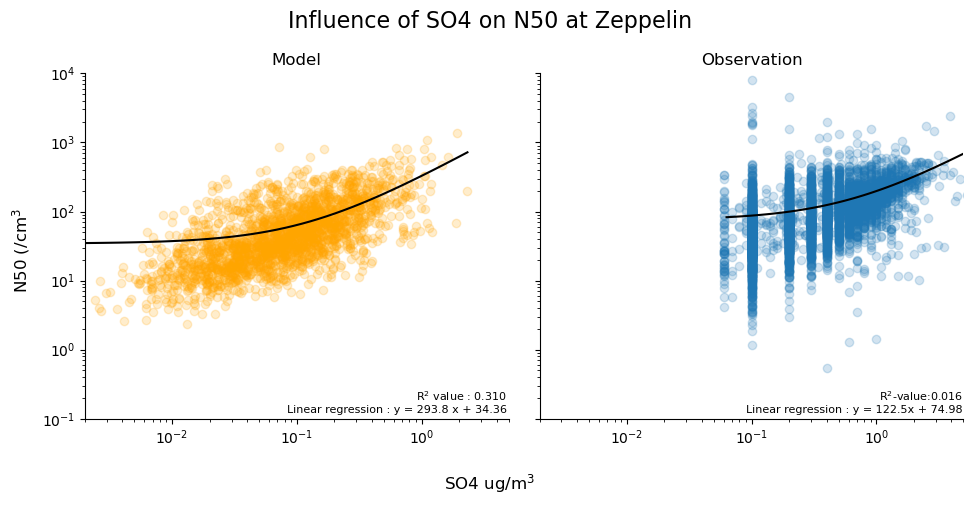

In [69]:
f, (ax1, ax2) = plt.subplots(1,2,tight_layout=True, sharey=True, sharex=True, figsize = (10,5))


_dss = ALLDATA[['SO4_Model','N50_Model']].dropna('time')
ax1.scatter(x=_dss['SO4_Model'], y=_dss['N50_Model'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SO4_Model'], _dss['N50_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_Model'].min()), np.log10(_dss['SO4_Model'].max()))
#print(p)
ax1.plot( x, p(x), c = 'black', )
ax1.text(0.083, 0.12, 'Linear regression : y = 293.8 x + 34.36' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SO4_Model']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50_Model'])
r_sq = model.score(x, _dss['N50_Model'])
#print(f"coefficient of determination: {r_sq}")
ax1.text(0.9, 0.18, f'R$^2$ value : {r_sq:0.3f}' ,fontsize=8)

ax1.set_ylim(0.1,10000)
ax1.set_xlim(0.002,5)
ax1.set_yscale ('log')
ax1.set_xscale ('log')
#ax1.set_xlabel('SO4 ug/m$^3$')
#ax1.set_ylabel('N50')
ax1.set_title(f'Model')

_dss = ALLDATA[['SO4','N50']].dropna('time')
ax2.scatter(x=_dss['SO4'], y=_dss['N50'], alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SO4'], _dss['N50'], 1)
p = np.poly1d(z)
x= np.logspace(-1.2, np.log10(_dss['SO4'].max()))
#print(p)
ax2.plot( x, p(x), c = 'black', )
ax2.text(0.09, 0.12, 'Linear regression : y = 122.5x + 74.98' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50'])
r_sq = model.score(x, _dss['N50'])
#print(r_sq)
ax2.text(1.05, 0.18, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)

ax2.set_ylim(0.1,10000)
ax2.set_xlim(0.002,5)
ax2.set_yscale ('log')
ax2.set_xscale ('log')
#plt.xlabel('SO4 ug/m$^3$')
#plt.ylabel('N50 ')
ax2.set_title(f'Observation')
f.suptitle('Influence of SO4 on N50 at Zeppelin', fontsize=16)
f.supxlabel('SO4 ug/m$^3$')
f.supylabel('N50 (/cm$^3$')

sns.despine(f)

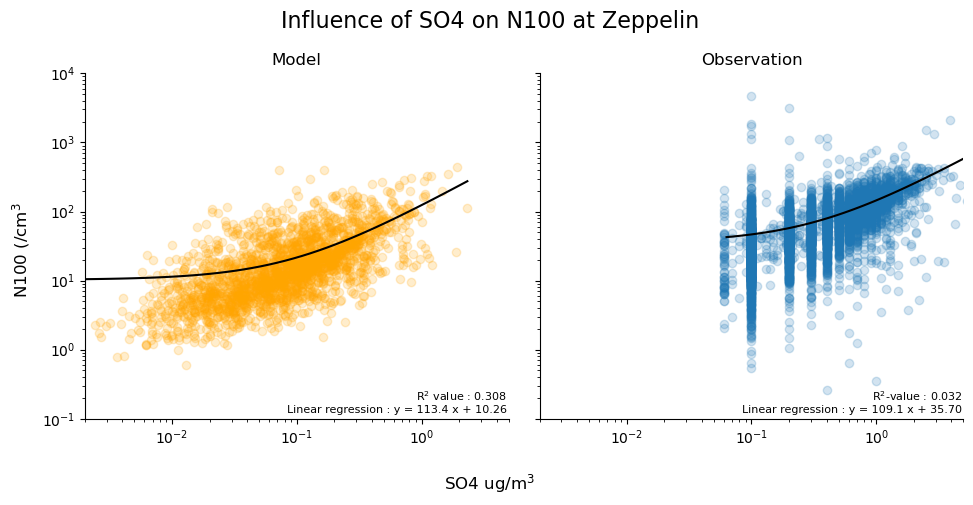

In [89]:
f, (ax1, ax2) = plt.subplots(1,2,tight_layout=True, sharey=True, sharex=True, figsize = (10,5))

_dss = ALLDATA[['SO4_Model','N100_Model']].dropna('time')
ax1.scatter(x=_dss['SO4_Model'], y=_dss['N100_Model'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SO4_Model'], _dss['N100_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_Model'].min()), np.log10(_dss['SO4_Model'].max()))
#print(p)
ax1.plot( x, p(x), c = 'black', )
ax1.text(0.083, 0.12, 'Linear regression : y = 113.4 x + 10.26' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SO4_Model']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N100_Model'])
r_sq = model.score(x, _dss['N100_Model'])
#print(f"coefficient of determination: {r_sq}")
ax1.text(0.9, 0.18, f'R$^2$ value : {r_sq:0.3f}' ,fontsize=8)

ax1.set_ylim(0.1,10000)
ax1.set_xlim(0.002,5)
ax1.set_yscale ('log')
ax1.set_xscale ('log')
#ax1.set_xlabel('SO4 ug/m$^3$')
#ax1.set_ylabel('N100')
ax1.set_title(f'Model')

_dss = ALLDATA[['SO4','N100']].dropna('time')
ax2.scatter(x=_dss['SO4'], y=_dss['N100'], alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SO4'], _dss['N100'], 1)
p = np.poly1d(z)
x= np.logspace(-1.2, np.log10(_dss['SO4'].max()))
#print(p)
ax2.plot( x, p(x), c = 'black', )
ax2.text(0.084, 0.12, 'Linear regression : y = 109.1 x + 35.70' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N100'])
r_sq = model.score(x, _dss['N100'])
#print(r_sq)
ax2.text(0.92, 0.18, f"R$^2$-value : {r_sq:.3f}"  ,fontsize=8)

ax2.set_ylim(0.1,10000)
ax2.set_xlim(0.002,5)
ax2.set_yscale ('log')
ax2.set_xscale ('log')
#plt.xlabel('SO4 ug/m$^3$')
#plt.ylabel('N100 ')
ax2.set_title(f'Observation')
f.suptitle('Influence of SO4 on N100 at Zeppelin', fontsize=16)
f.supxlabel('SO4 ug/m$^3$')
f.supylabel('N100 (/cm$^3$')

sns.despine(f)

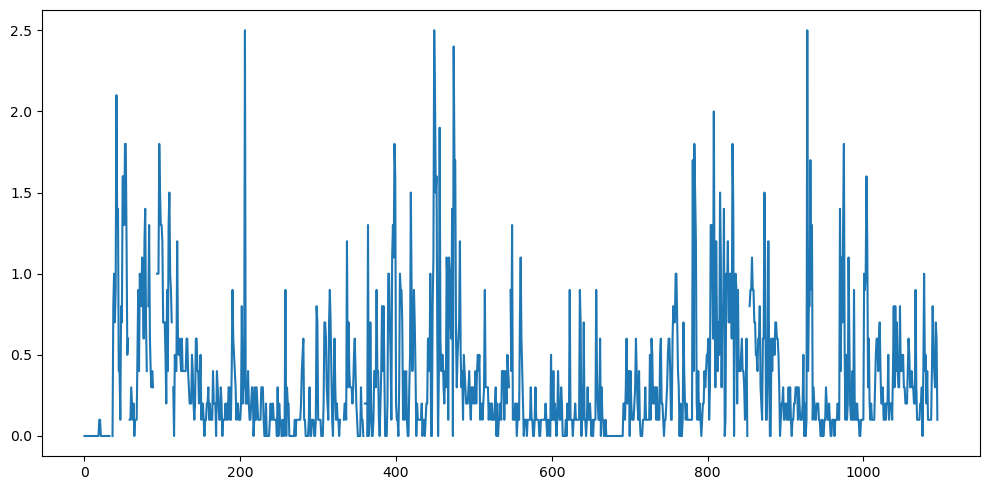

In [87]:
f, (ax1) = plt.subplots(1,tight_layout=True, figsize = (10,5))


_dss = ALLDATA[['SO4_Model','N100_Model']].dropna('time')
ax1.plot(ALLDATA['SO4'].sel(time=slice('2015-01','2017-12')))

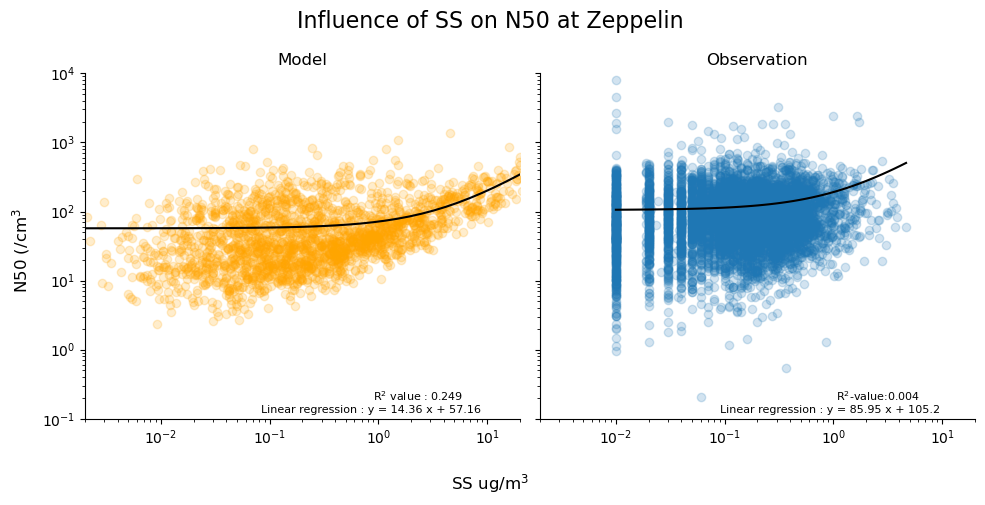

In [95]:
f, (ax1, ax2) = plt.subplots(1,2,tight_layout=True, sharey=True, sharex=True, figsize = (10,5))


_dss = ALLDATA[['SS_Model','N50_Model']].dropna('time')
ax1.scatter(x=_dss['SS_Model'], y=_dss['N50_Model'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SS_Model'], _dss['N50_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SS_Model'].min()), np.log10(_dss['SS_Model'].max()))
#print(p)
ax1.plot( x, p(x), c = 'black', )
ax1.text(0.083, 0.12, 'Linear regression : y = 14.36 x + 57.16' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SS_Model']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50_Model'])
r_sq = model.score(x, _dss['N50_Model'])
#print(f"coefficient of determination: {r_sq}")
ax1.text(0.9, 0.18, f'R$^2$ value : {r_sq:0.3f}' ,fontsize=8)

ax1.set_ylim(0.1,10000)
ax1.set_xlim(0.002,20)
ax1.set_yscale ('log')
ax1.set_xscale ('log')
#ax1.set_xlabel('SS ug/m$^3$')
#ax1.set_ylabel('N50')
ax1.set_title(f'Model')

_dss = ALLDATA[['SS','N50']].dropna('time')
ax2.scatter(x=_dss['SS'], y=_dss['N50'], alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SS'], _dss['N50'], 1)
p = np.poly1d(z)
x= np.logspace(-2, np.log10(_dss['SS'].max()))
#print(p)
ax2.plot( x, p(x), c = 'black', )
ax2.text(0.09, 0.12, 'Linear regression : y = 85.95 x + 105.2' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SS']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50'])
r_sq = model.score(x, _dss['N50'])
#print(r_sq)
ax2.text(1.05, 0.18, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)

ax2.set_ylim(0.1,10000)
ax2.set_xlim(0.002,20)
ax2.set_yscale ('log')
ax2.set_xscale ('log')
#plt.xlabel('SS ug/m$^3$')
#plt.ylabel('N50 ')
ax2.set_title(f'Observation')
f.suptitle('Influence of SS on N50 at Zeppelin', fontsize=16)
f.supxlabel('SS ug/m$^3$')
f.supylabel('N50 (/cm$^3$')

sns.despine(f)

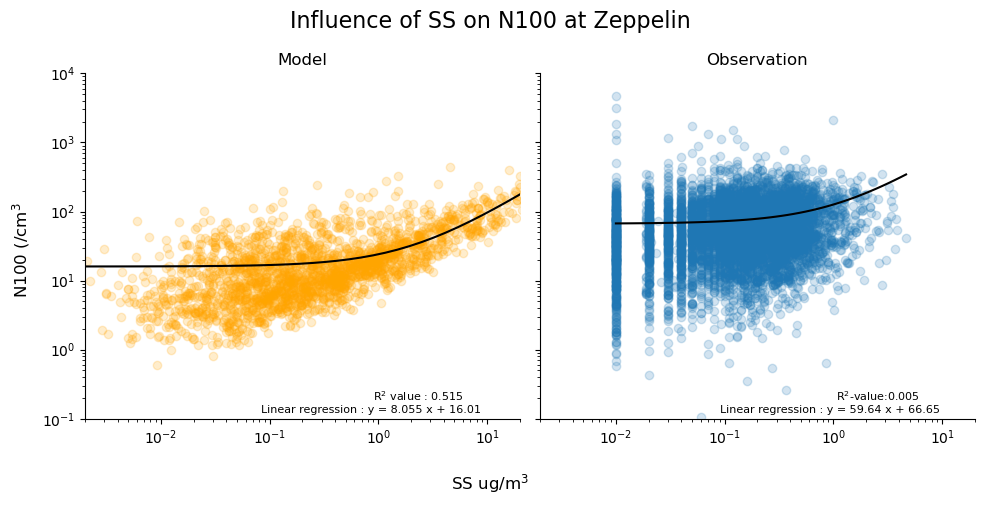

In [98]:
f, (ax1, ax2) = plt.subplots(1,2,tight_layout=True, sharey=True, sharex=True, figsize = (10,5))


_dss = ALLDATA[['SS_Model','N100_Model']].dropna('time')
ax1.scatter(x=_dss['SS_Model'], y=_dss['N100_Model'],c='orange',alpha = 0.2)

#Linear regression
z = np.polyfit(_dss['SS_Model'], _dss['N100_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SS_Model'].min()), np.log10(_dss['SS_Model'].max()))
#print(p)
ax1.plot( x, p(x), c = 'black', )
ax1.text(0.083, 0.12, 'Linear regression : y = 8.055 x + 16.01' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SS_Model']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N100_Model'])
r_sq = model.score(x, _dss['N100_Model'])
#print(f"coefficient of determination: {r_sq}")
ax1.text(0.9, 0.18, f'R$^2$ value : {r_sq:0.3f}' ,fontsize=8)

ax1.set_ylim(0.1,10000)
ax1.set_xlim(0.002,20)
ax1.set_yscale ('log')
ax1.set_xscale ('log')
#ax1.set_xlabel('SS ug/m$^3$')
#ax1.set_ylabel('N100')
ax1.set_title(f'Model')

_dss = ALLDATA[['SS','N100']].dropna('time')
ax2.scatter(x=_dss['SS'], y=_dss['N100'], alpha = 0.2 )

#Linear regression
z = np.polyfit(_dss['SS'], _dss['N100'], 1)
p = np.poly1d(z)
x= np.logspace(-2, np.log10(_dss['SS'].max()))
#print(p)
ax2.plot( x, p(x), c = 'black', )
ax2.text(0.09, 0.12, 'Linear regression : y = 59.64 x + 66.65' ,fontsize=8)

#Calculating R-Squared
x = np.array([_dss['SS']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N100'])
r_sq = model.score(x, _dss['N100'])
#print(r_sq)
ax2.text(1.05, 0.18, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)

ax2.set_ylim(0.1,10000)
ax2.set_xlim(0.002,20)
ax2.set_yscale ('log')
ax2.set_xscale ('log')
#plt.xlabel('SS ug/m$^3$')
#plt.ylabel('N100 ')
ax2.set_title(f'Observation')
f.suptitle('Influence of SS on N100 at Zeppelin', fontsize=16)
f.supxlabel('SS ug/m$^3$')
f.supylabel('N100 (/cm$^3$')

sns.despine(f)

 
0.06022 x + 0.1185


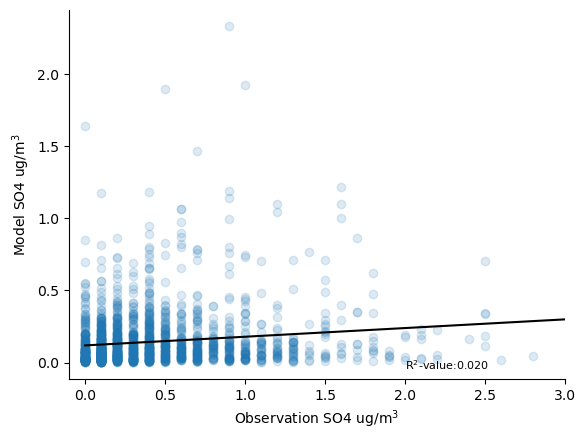

In [102]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SO4'], _dss['SO4_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['SO4_Model'].min()), np.log10(_dss['SO4'].max()))
ax.plot( x, p(x), c = 'black', )
print(p)



plt.xlabel('Observation SO4 ug/m$^3$')
plt.ylabel('Model SO4 ug/m$^3$')
ax.set_xlim ([-0.1,3])

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SO4_Model'])
r_sq = model.score(x, _dss['SO4_Model'])
ax.text(2.0, -0.05, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine(f)

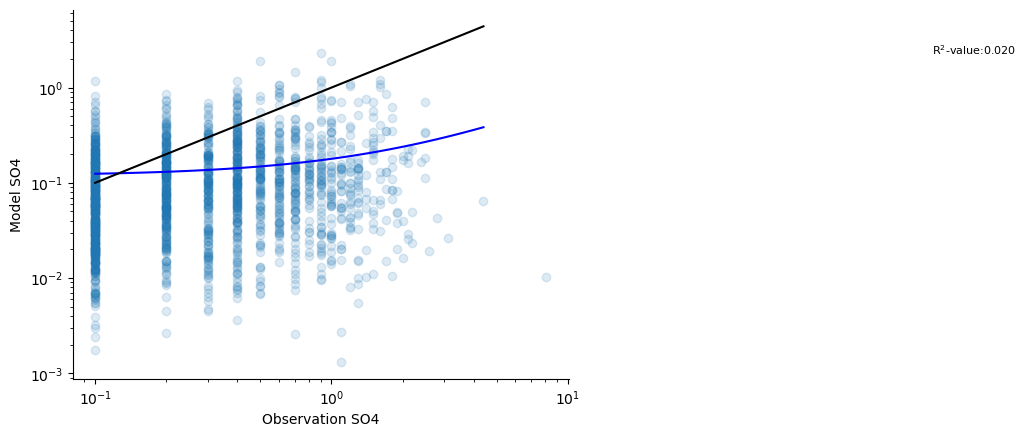

In [114]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SO4'], y = ALLDATA['SO4_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SO4'], _dss['SO4_Model'], 1)
p = np.poly1d(z)
x= np.logspace(-1, np.log10(_dss['SO4'].max()))
ax.plot( x, p(x), c = 'blue', )
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation SO4')
plt.ylabel('Model SO4')

#Calculating R-Squared
x = np.array([_dss['SO4']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SO4_Model'])
r_sq = model.score(x, _dss['SO4_Model'])
ax.text(350, 2.2, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

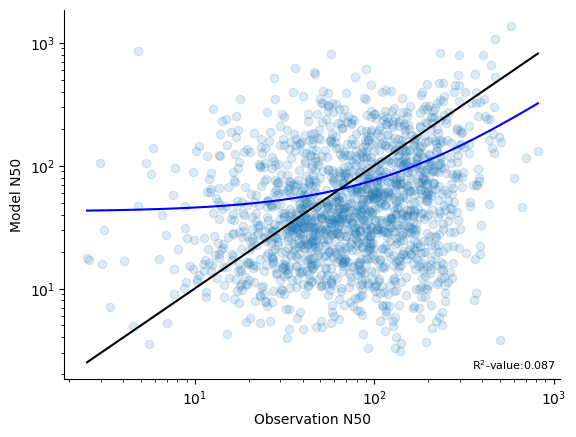

In [109]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N50'], y = ALLDATA['N50_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N50'], _dss['N50_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N50'].min()), np.log10(_dss['N50'].max()))
ax.plot( x, p(x), c = 'blue', )
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N50')
plt.ylabel('Model N50')

#Calculating R-Squared
x = np.array([_dss['N50']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N50_Model'])
r_sq = model.score(x, _dss['N50_Model'])
ax.text(350, 2.2, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

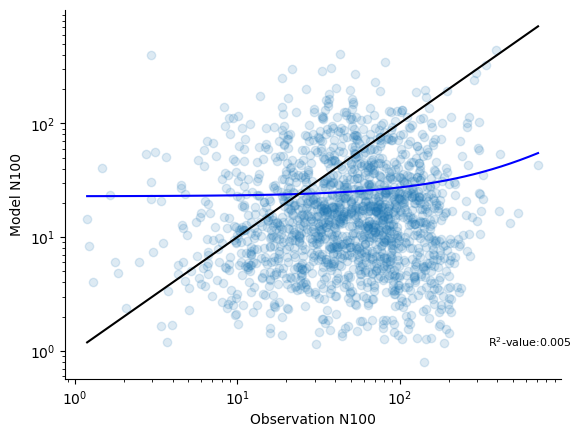

In [110]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['N100'], y = ALLDATA['N100_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['N100'], _dss['N100_Model'], 1)
p = np.poly1d(z)
x= np.logspace(np.log10(_dss['N100'].min()), np.log10(_dss['N100'].max()))
ax.plot( x, p(x), c = 'blue', )
ax.plot( x, x, c = 'black', )
#print(p)

ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation N100')
plt.ylabel('Model N100')

#Calculating R-Squared
x = np.array([_dss['N100']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['N100_Model'])
r_sq = model.score(x, _dss['N100_Model'])
ax.text(350, 1.1, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()

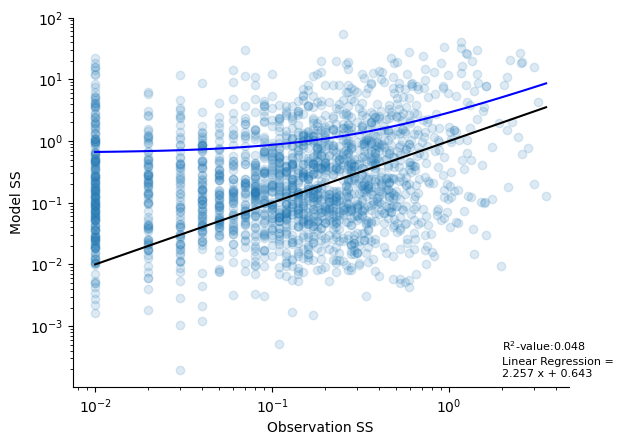

In [106]:
f, ax = plt.subplots()
ax.scatter(x = ALLDATA['SS'], y = ALLDATA['SS_Model'],alpha = 0.15)
_dss = ALLDATA.to_dataframe().dropna()
z = np.polyfit(_dss['SS'], _dss['SS_Model'], 1)
p = np.poly1d(z)
x= np.logspace(-2, np.log10(_dss['SS'].max()))
ax.plot( x, p(x), c = 'blue', )
ax.plot( x, x, c = 'black', )
#print(p)

ax.text(2.0, 0.00015, f"Linear Regression = {p}"  ,fontsize=8)
ax.set_yscale ('log')
ax.set_xscale ('log')
plt.xlabel('Observation SS')
plt.ylabel('Model SS')

#Calculating R-Squared
x = np.array([_dss['SS']]).reshape((-1, 1))
model = LinearRegression().fit (x, _dss['SS_Model'])
r_sq = model.score(x, _dss['SS_Model'])
ax.text(2.0, 0.0004, f"R$^2$-value:{r_sq:.3f}"  ,fontsize=8)
#ax.text(0.3, 0.15, f"R$^2$-value:{r_sq}0.3f"  ,fontsize=8)
    
sns.despine()